In [1]:
#Cesar Borroto

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Set an environment variable to avoid potential conflicts
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
# Load the CIFAR-10 dataset
#class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
#"Dog", "Frog", "Horse", "Ship", "Truck"]
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define a deep convolutional neural network model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5942 - accuracy: 0.4144 - val_loss: 1.3493 - val_accuracy: 0.5193
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2013 - accuracy: 0.5700 - val_loss: 1.1352 - val_accuracy: 0.5975
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0586 - accuracy: 0.6226 - val_loss: 1.0939 - val_accuracy: 0.6180
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9592 - accuracy: 0.6623 - val_loss: 0.9981 - val_accuracy: 0.6544
Epoch 5/15
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8813 - accuracy: 0.6900 - val_loss: 0.9481 - val_accuracy: 0.6759
Epoch 6/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8214 - accuracy: 0.7116 - val_loss: 0.9187 - val_accuracy: 0.6840
Epoch 7/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7707 - accuracy: 0.7289 - val_loss: 0.9315 - val_accuracy:

In [7]:
# Load a local image for testing (replace 'image.jpg' with your image path)
image_path = 'image.jpg'  # Replace with your local image path
img = Image.open(image_path)
img = img.resize((32, 32))  # Resize the image to match the model's input size

In [8]:
# Convert the grayscale image to RGB (3 channels)
img = img.convert("RGB")

In [9]:
# Preprocess the image
img_array = np.array(img) / 255.0  # Preprocess the image
img_array = img_array.reshape(1, 32, 32, 3)  # Reshape to match the input shape

In [10]:
# Make predictions on the local image
class_predictions = model.predict(img_array)
class_label = np.argmax(class_predictions)

1/1 [==============================] - 0s 73ms/step


Predicted Class: Airplane


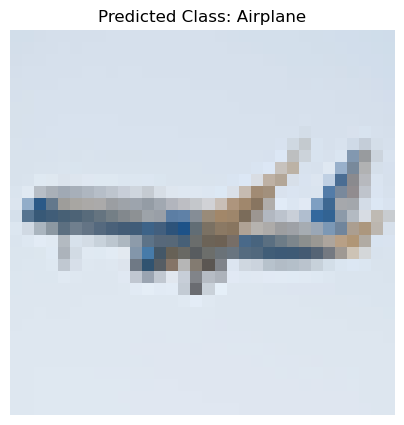

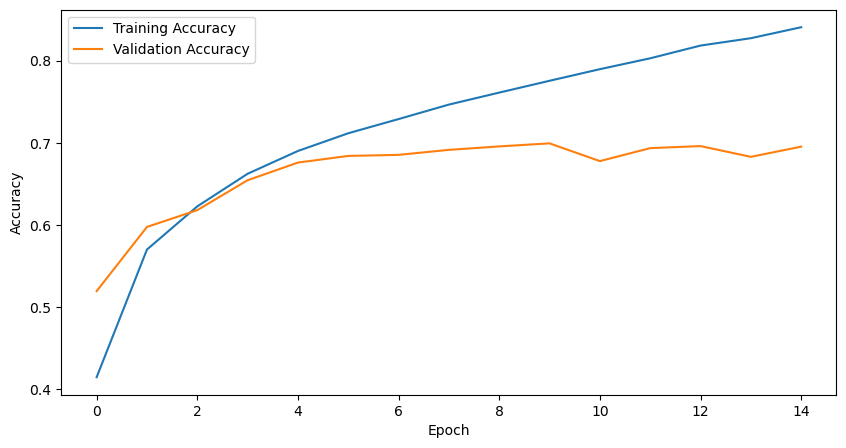

In [11]:
# Display the predicted class
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
predicted_class = class_names[class_label]
print(f'Predicted Class: {predicted_class}')

# Plot the uploaded image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()